# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
temp=[]
lat=[]
long=[]
humidity=[]
windspeed=[]
cloud=[]
country=[]
date=[]
cityfound=[]
for city in cities:
    url=f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
    try:
        weather=requests.get(url).json()
        temp.append(weather["main"]["temp"])
        lat.append(weather["coord"]["lat"])
        long.append(weather["coord"]["lon"])
        humidity.append(weather["main"]["humidity"])
        windspeed.append(weather["wind"]["speed"])
        cloud.append(weather["clouds"]["all"])
        country.append(weather["sys"]["country"])
        date.append(weather["dt"])
        cityfound.append(city)
        print("found " + city)
    except:
        print("couldn't find " + city)
temp

city_df=pd.DataFrame({"Temperature":temp,
                      "Latitude":lat,
                      "Longitude":long,
                      "Humidity":humidity,
                      "Wind Speed":windspeed,
                      "Cloud":cloud,
                      "Country":country,
                      "Date":date,
                      "City":cityfound
                      })
city_df


found punta arenas
found ushuaia
found rikitea
found las choapas
found sale
found bathsheba
couldn't find paradwip
found geraldton
found qaanaaq
found port alfred
found niono
found port elizabeth
found pisco
found ecoporanga
found dicabisagan
found mehamn
found mangai
found atuona
found okato
found hobart
couldn't find el buen pastor
found hilo
found port lincoln
found torbay
couldn't find saleaula
found chokurdakh
found kapaa
found hovd
found havoysund
found cidreira
found fortuna
found castro
found bluff
found turbat
found huarmey
found mataura
found cabo san lucas
couldn't find rungata
found khandbari
couldn't find dolbeau
found sitka
found puerto ayora
found aklavik
found bougouni
found mahebourg
found cabinda
found vaini
found coahuayana
found narsaq
found djambala
found wanning
couldn't find amderma
found mar del plata
found saint-philippe
found busselton
found nanhai
found norman wells
found ust-nera
found namibe
found carnarvon
found belyy yar
couldn't find taolanaro
found auki

found tura
found kutum
found richards bay
found along
couldn't find balimo
found issoire
found sao joao da barra
couldn't find jinchengjiang
found melk
found gambela
found pangnirtung
couldn't find nguiu
found port-cartier
found ixtapa
found cabedelo
found bara
found garissa
found sept-iles
found magdalena
couldn't find meyungs
found fulton
couldn't find artyk
found flinders
found chapais
found michigan city
found palu
found trinec
found zyryanka
found elizabeth city
found dakoro
found hualmay
found agaro
couldn't find tawnat
found udachnyy
found kudahuvadhoo
found ngunguru
found juegang
found east wenatchee bench
found sioux lookout
found veraval
found pulaski
found rundu
found hobyo
found kaffrine
found kedrovoye
found thunder bay
found taybad
found lazaro cardenas
found manzhouli
found hlotse
found darhan
found imeni poliny osipenko
found rudnyy
found umba
found ahuimanu
couldn't find ituni
found botou
couldn't find kuche
found visnes
found somerton
found saint george
found kieta
fo

,Temperature,Latitude,Longitude,Humidity,Wind Speed,Cloud,Country,Date,City
0,42.53,-53.1500,-70.9167,87,11.50,75,CL,1627418329,punta arenas
1,37.06,-54.8000,-68.3000,93,0.00,90,AR,1627418329,ushuaia
2,74.48,-23.1203,-134.9692,77,15.10,100,PF,1627418329,rikitea
3,89.65,17.9333,-94.0833,71,8.39,98,MX,1627418330,las choapas
4,73.26,34.0389,-6.8166,94,3.44,0,MA,1627418330,sale
...,...,...,...,...,...,...,...,...,...
535,76.42,-9.4431,147.1797,94,3.44,40,PG,1627418482,port moresby
536,73.26,41.6096,-4.7969,57,6.91,0,ES,1627418483,arroyo
537,70.07,-17.2856,-42.7300,40,3.44,6,BR,1627418483,turmalina
538,95.94,41.3000,-96.1670,53,4.00,1,US,1627418483,douglas


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
city_df.to_csv("city.csv")

In [9]:
city_df

,Temperature,Latitude,Longitude,Humidity,Wind Speed,Cloud,Country,Date,City
0,42.53,-53.1500,-70.9167,87,11.50,75,CL,1627418329,punta arenas
1,37.06,-54.8000,-68.3000,93,0.00,90,AR,1627418329,ushuaia
2,74.48,-23.1203,-134.9692,77,15.10,100,PF,1627418329,rikitea
3,89.65,17.9333,-94.0833,71,8.39,98,MX,1627418330,las choapas
4,73.26,34.0389,-6.8166,94,3.44,0,MA,1627418330,sale
...,...,...,...,...,...,...,...,...,...
535,76.42,-9.4431,147.1797,94,3.44,40,PG,1627418482,port moresby
536,73.26,41.6096,-4.7969,57,6.91,0,ES,1627418483,arroyo
537,70.07,-17.2856,-42.7300,40,3.44,6,BR,1627418483,turmalina
538,95.94,41.3000,-96.1670,53,4.00,1,US,1627418483,douglas


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
humidity_df=city_df.loc[city_df["Humidity"]>100]
len(humidity_df)

0

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

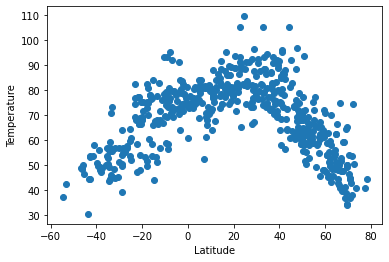

In [13]:
x_values = city_df['Latitude']
y_values = city_df['Temperature']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

## Latitude vs. Humidity Plot

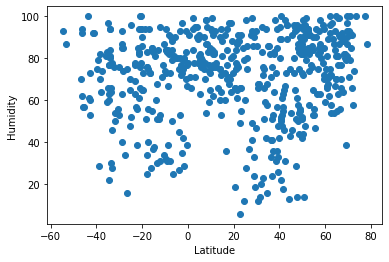

In [14]:
x_values = city_df['Latitude']
y_values = city_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

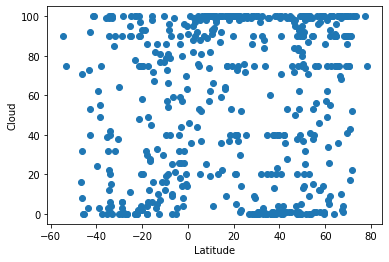

In [15]:
x_values = city_df['Latitude']
y_values = city_df['Cloud']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloud')
plt.show()

## Latitude vs. Wind Speed Plot

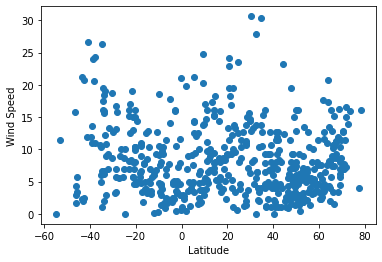

In [16]:
x_values = city_df['Latitude']
y_values = city_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
Northern_df=city_df.loc[city_df["Latitude"]>0]


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression